In [1]:
import pandas as pd
df = pd.read_csv("/home/zumi/Documents/Kifiya training/Week 0/Resources/data/sierraleone-bumbuna.csv")  

In [2]:
# Summary stats
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [3]:
# Missing value report
missing = df.isna().sum()
missing[missing > 0]

Comments    525600
dtype: int64

In [4]:
# Highlight columns with >5% nulls
missing_percent = (df.isna().mean()) * 100
missing_percent[missing_percent > 5]

Comments    100.0
dtype: float64

In [5]:
from scipy.stats import zscore

# Columns to check
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = df[cols].apply(zscore)

# Flag outliers where |Z| > 3
outliers = (z_scores.abs() > 3)

# View rows with any outlier
df_outliers = df[outliers.any(axis=1)]

# Handle missing values
df_cleaned = df.copy()
df_cleaned[cols] = df_cleaned[cols].fillna(df_cleaned[cols].median())

# Export cleaned data
df_cleaned.to_csv("/home/zumi/Documents/Kifiya training/Week 0/Resources/data/sierraleone-bumbuna.csv", index=False)

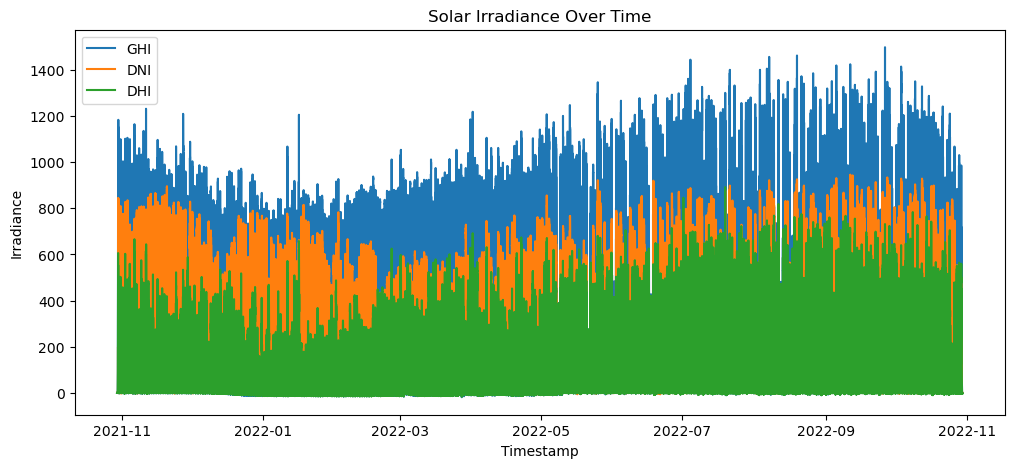

In [6]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(12, 5))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.legend()
plt.title("Solar Irradiance Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Irradiance")
plt.show()

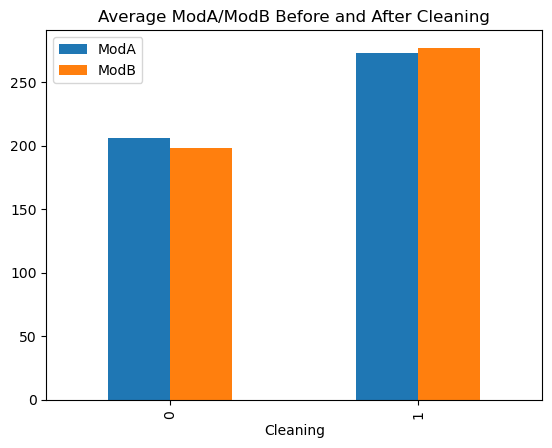

In [7]:
df_cleaned.groupby("Cleaning")[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Average ModA/ModB Before and After Cleaning")
plt.show()

<Axes: xlabel='WS', ylabel='GHI'>

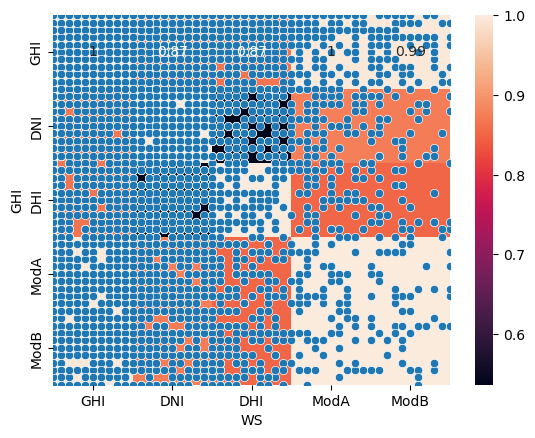

In [8]:
import seaborn as sns

# Heatmap
sns.heatmap(df_cleaned[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True)

# Scatter plots
sns.scatterplot(x='WS', y='GHI', data=df_cleaned)
sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)

<Axes: >

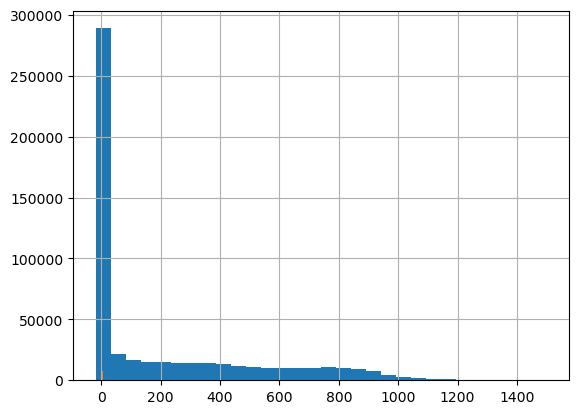

In [9]:
# Histograms
df_cleaned['GHI'].hist(bins=30)
df_cleaned['WS'].hist(bins=30)

<Axes: xlabel='RH', ylabel='Tamb'>

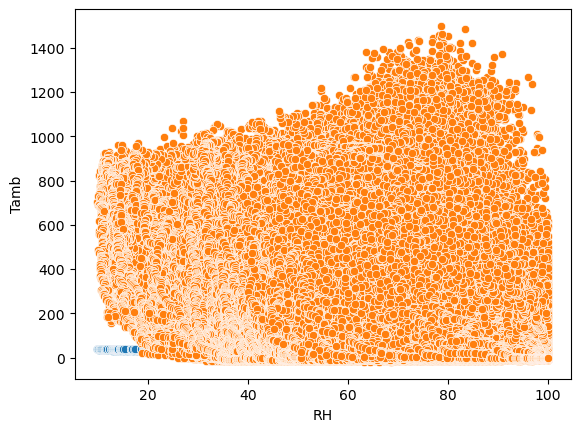

In [10]:
sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)
sns.scatterplot(x='RH', y='GHI', data=df_cleaned)